In [4]:
from autogluon.tabular import TabularDataset, TabularPredictor
import numpy as np
import math

In [5]:
train_data = TabularDataset(f'Data/phil_rangedata_train.csv')
train_data.head()

,initial_SOC,final_SOC,altitude,avg_speed,total_distance
0,100.000031,100.000031,-3.061713,7.642350,4585.410159
1,100.000031,100.000031,-0.397832,4.726447,2822.495564
2,100.000031,99.607872,-2.267668,5.793851,3476.310818
3,100.000031,99.215721,-10.155657,11.395269,6837.161613
4,99.607872,97.254936,-10.348317,19.169618,11486.297899


In [6]:
label = 'final_SOC'
train_data[label].describe()

count    1835.000000
mean       63.988168
std        24.627558
min        11.764709
25%        42.156876
50%        69.803947
75%        84.901989
max       100.000031
Name: final_SOC, dtype: float64

In [7]:
predictor = TabularPredictor(label=label,eval_metric='root_mean_squared_error').fit(
    train_data, 
    presets=['best_quality','optimize_for_deployment'], 
    time_limit = 30*60,
    verbosity=1) 

No path specified. Models will be saved in: "AutogluonModels/ag-20230416_020535/"
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Deleting model KNeighborsUnif_BAG_L1. All files under AutogluonModels/ag-20230416_020535/models/KNeighborsUnif_BAG_L1/ will be removed.
Deleting model KNeighborsDist_BAG_L1. All files under AutogluonModels/ag-20230416_020535/models/KNeighborsDist_BAG_L1/ will be removed.
Deleting model LightGBM_BAG_L1. All files under AutogluonModels/ag-20230416_020535/models/LightGBM_BAG_L1/ will be removed.
Deleting model RandomForestMSE_BAG_L1. All files under AutogluonModels/ag-20230416_020535/models/RandomForestMSE_BAG_L1/ will be removed.
Deleting model ExtraTreesMSE_BAG_L1. All f

In [8]:
test_data = TabularDataset(f'Data/phil_rangedata_test.csv')

y_pred = predictor.predict(test_data.drop(columns=[label]))
y_pred.head()

0    78.462601
1    72.623260
2    55.493099
3    57.557678
4    63.586552
Name: final_SOC, dtype: float32

In [9]:
predictor.evaluate(test_data, silent=True)

/home/witvoetk/anaconda3/envs/tf/lib/python3.10/site-packages/autogluon/tabular/predictor/predictor.py:1420: FutureWarning: Calling `predictor.predict_proba` when problem_type=regression will raise an AssertionError starting in AutoGluon v0.8. Please call `predictor.predict` instead.
  warnings.warn(


{'root_mean_squared_error': -6.538374669901147,
 'mean_squared_error': -42.75034332400493,
 'mean_absolute_error': -5.3045017042177935,
 'r2': 0.9207184378433363,
 'pearsonr': 0.9638629647504025,
 'median_absolute_error': -4.471305847167965}

In [10]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-6.538375,-1.985065,2.617352,1.896105,348.877263,0.002291,0.000449,0.298585,2,True,6
1,NeuralNetFastAI_BAG_L1,-6.540290,-2.089514,0.399825,0.485281,88.810573,0.399825,0.485281,88.810573,1,True,3
2,NeuralNetTorch_BAG_L1,-6.600660,-2.133230,0.259251,0.615031,109.189612,0.259251,0.615031,109.189612,1,True,5
3,XGBoost_BAG_L1,-8.595013,-2.200257,0.429540,0.275572,68.321144,0.429540,0.275572,68.321144,1,True,4
4,CatBoost_BAG_L1,-8.649926,-2.157176,0.095137,0.270223,60.048924,0.095137,0.270223,60.048924,1,True,2
5,LightGBMXT_BAG_L1,-9.732277,-2.287223,1.431308,0.249548,22.208424,1.431308,0.249548,22.208424,1,True,1


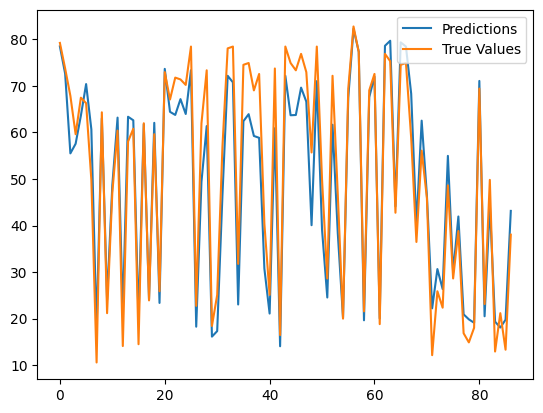

In [11]:
#plots the predicted vs actual values of the top performing model using matplotlib
import matplotlib.pyplot as plt
plt.plot(y_pred, label="Predictions")
plt.plot(test_data[label], label="True Values")
plt.legend()
plt.show()

In [12]:
mse_test = np.mean(((y_pred - test_data[label])**2))
rmse_test = math.sqrt(mse_test)
print("test data rmse", rmse_test)

test data rmse 6.538374669901147


In [14]:
# save the predictions and actual values to a csv file, with predictions in the first column and actual values in the second column
import pandas as pd
df = pd.DataFrame({'Predicted': y_pred, 'Actual': test_data[label]})
df.to_csv('Data/phil_rangedata_predictions.csv', index=False)
